In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from collections import Counter, defaultdict
import networkx as nx

def read_tokens(f):
    return f.readline().strip().split()

def read_ints(f):
    return list(map(int, read_tokens(f)))


def analyze_file(f):
    n_contributors, n_projects = read_ints(f)
    
    print("Number of contributors:", n_contributors)
    print("Number of projects:", n_projects)
    
    n_skills_list = []
    skills = []
    
    all_contrib_skill_levels = []
    all_skills = set()
    for i in range(n_contributors):
        c_name, n_skills = read_tokens(f)
        n_skills = int(n_skills)
        n_skills_list.append(n_skills)
        skills_dct = {}
        for j in range(n_skills):
            k, v = read_tokens(f)
            v = int(v)
            skills_dct[k] = v
            all_contrib_skill_levels.append(v)
            all_skills.add(k)

        skills.append(skills_dct)
        
    print("AVG skill level per contributor:", sum(all_contrib_skill_levels) / len(all_contrib_skill_levels))
    print("Total number of unique skills:", len(all_skills))
    print()
        
    all_proj_skill_levels = []
    scores = []
    proj_days_list = []
    best_befores = []
    n_roles_list = []
    n_unique_roles_list = []
    
    max_day = 0
    has_duplicate_roles_in_projects = False
    skill_1_required = 0
    for i in range(n_projects):
        proj_name, proj_days, score, best_before, n_roles = read_tokens(f)
        proj_days = int(proj_days)
        score = int(score)
        best_before = int(best_before)
        n_roles = int(n_roles)
        max_day = max(max_day, score+best_before)
        
        scores.append(score)
        proj_days_list.append(proj_days)
        best_befores.append(best_before)
        n_roles_list.append(n_roles)
        
        skills_list = []
        unique_skills = set()
        skill_1 = False
        for j in range(n_roles):
            k, v = read_tokens(f)
            v = int(v)
            
            if v == 1 and not skill_1:
                skill_1 = True
                skill_1_required += 1
            
            if k in unique_skills:
                has_duplicate_roles_in_projects = True
            else:
                unique_skills.add(k)
            if k not in all_skills:
                print("NOT EXISTING SKILL!!!!", k)
            skills_dct[k] = v
            all_proj_skill_levels.append(v)
        n_unique_roles_list.append(len(unique_skills))
        
        
    fig, axs = plt.subplots(3, 2, figsize=(20, 16))
    axs[0][0].set_title("Distribution of skill levels for contributors and projects")
    axs[0][0].hist(all_contrib_skill_levels, bins=min(100, len(all_contrib_skill_levels)+1), color='blue')
    axs[0][0].hist(all_proj_skill_levels, bins=min(100, len(all_contrib_skill_levels)+1), color='red')

    axs[0][1].set_title("Distribution of numbers of skills contributors")
    axs[0][1].hist(n_skills_list, bins=min(100, len(n_skills_list)+1))
    
    axs[1][1].set_title("Distribution of numbers of roles for projects")
    axs[1][1].hist(n_roles_list, bins=min(100, len(n_roles_list)+1))

    axs[2][0].set_title("Best before distribution")
    axs[2][0].hist(best_befores, bins=min(100, len(best_befores)+1))

    axs[2][1].set_title("Number of days for projects")
    axs[2][1].hist(proj_days_list, bins=min(100, len(proj_days_list)+1))

    plt.show()
            
    
    sum_scores = sum(scores)
    print("MAX SCORE (SUM OF ALL SCORES):", sum_scores)
    print("AVG score per project:", sum_scores / n_projects)
    print("Max day to get score:", max_day)
    print()
    print("AVG number of days per project:", sum(proj_days_list) / n_projects)
    print("AVG best_before:", sum(best_befores) / n_projects)
    print()
    print("AVG number of roles per project:", sum(n_roles_list) / n_projects)
    print("AVG number of unique roles per project:", sum(n_unique_roles_list) / n_projects)
    print("SKILL 1 role requires in {}/{} projects".format(skill_1_required, n_projects))
    if has_duplicate_roles_in_projects:
        print("Projects HAVE duplicate roles")
    else:
        print("Projects DON'T HAVE duplicate roles")
        
    return sum_scores

------------------------------
Stats for a.in
Number of contributors: 3
Number of projects: 3
AVG skill level per contributor: 3.75
Total number of unique skills: 4



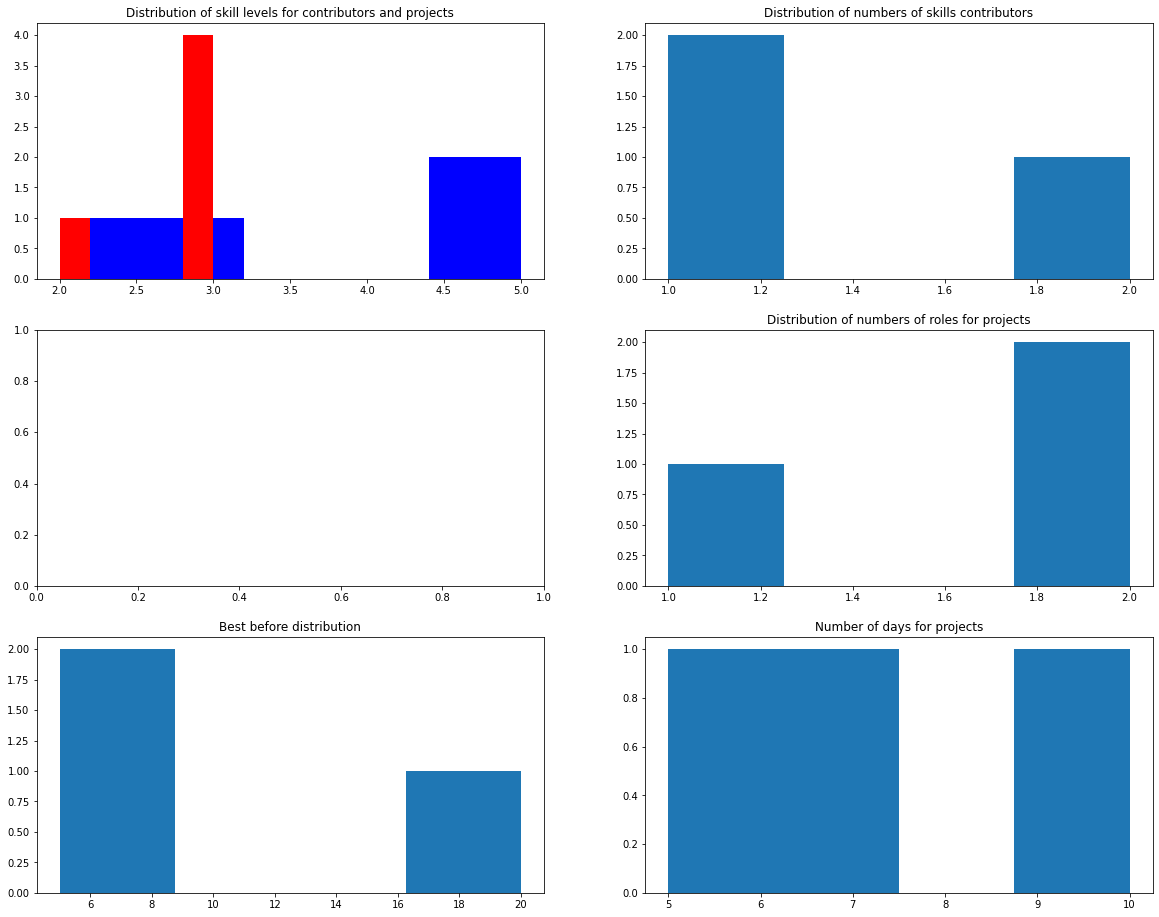

MAX SCORE (SUM OF ALL SCORES): 40
AVG score per project: 13.333333333333334
Max day to get score: 40

AVG number of days per project: 7.333333333333333
AVG best_before: 10.666666666666666

AVG number of roles per project: 1.6666666666666667
AVG number of unique roles per project: 1.6666666666666667
SKILL 1 role requires in 0/3 projects
Projects DON'T HAVE duplicate roles



------------------------------
Stats for b.in
Number of contributors: 50
Number of projects: 100
AVG skill level per contributor: 5.7
Total number of unique skills: 36



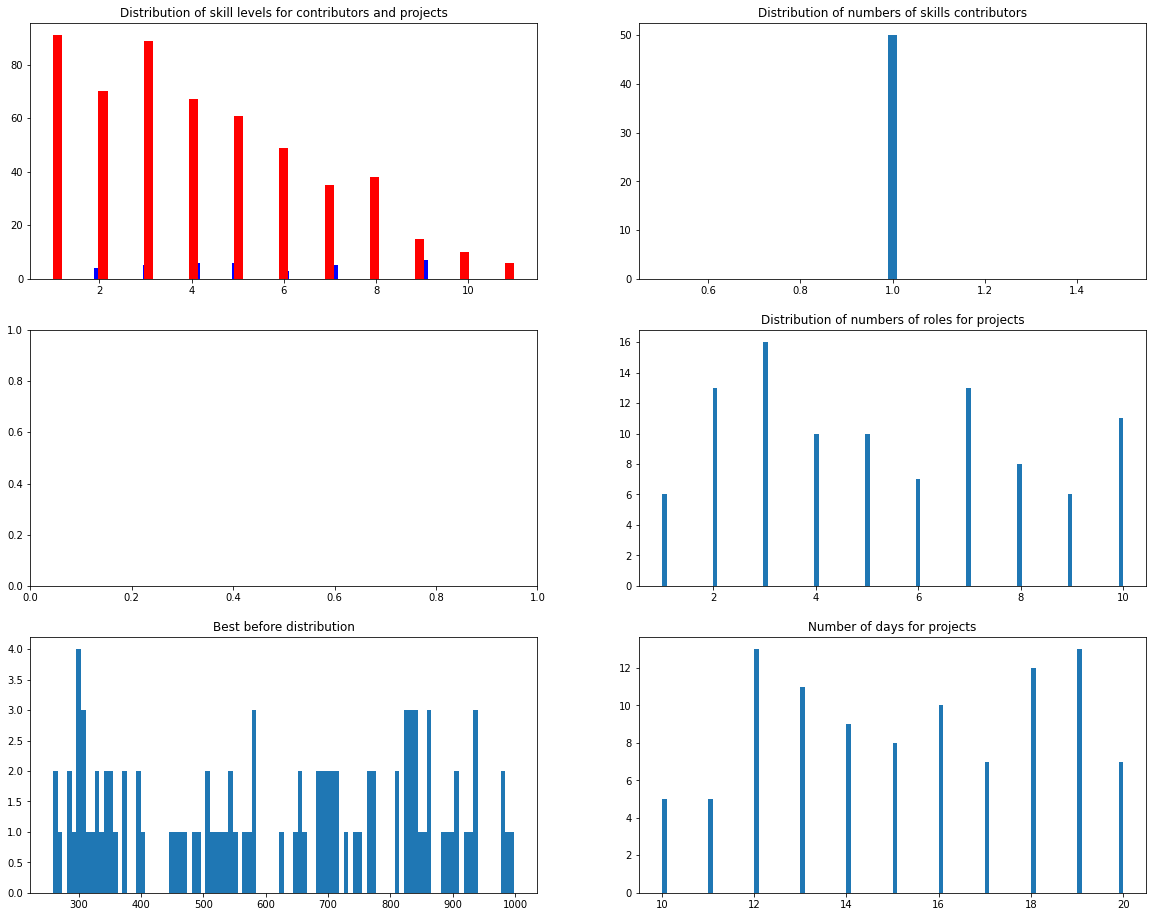

MAX SCORE (SUM OF ALL SCORES): 1239673
AVG score per project: 12396.73
Max day to get score: 37740

AVG number of days per project: 15.32
AVG best_before: 615.7

AVG number of roles per project: 5.31
AVG number of unique roles per project: 4.92
SKILL 1 role requires in 53/100 projects
Projects HAVE duplicate roles



------------------------------
Stats for c.in
Number of contributors: 1500
Number of projects: 1000
AVG skill level per contributor: 2.500333407423872
Total number of unique skills: 200



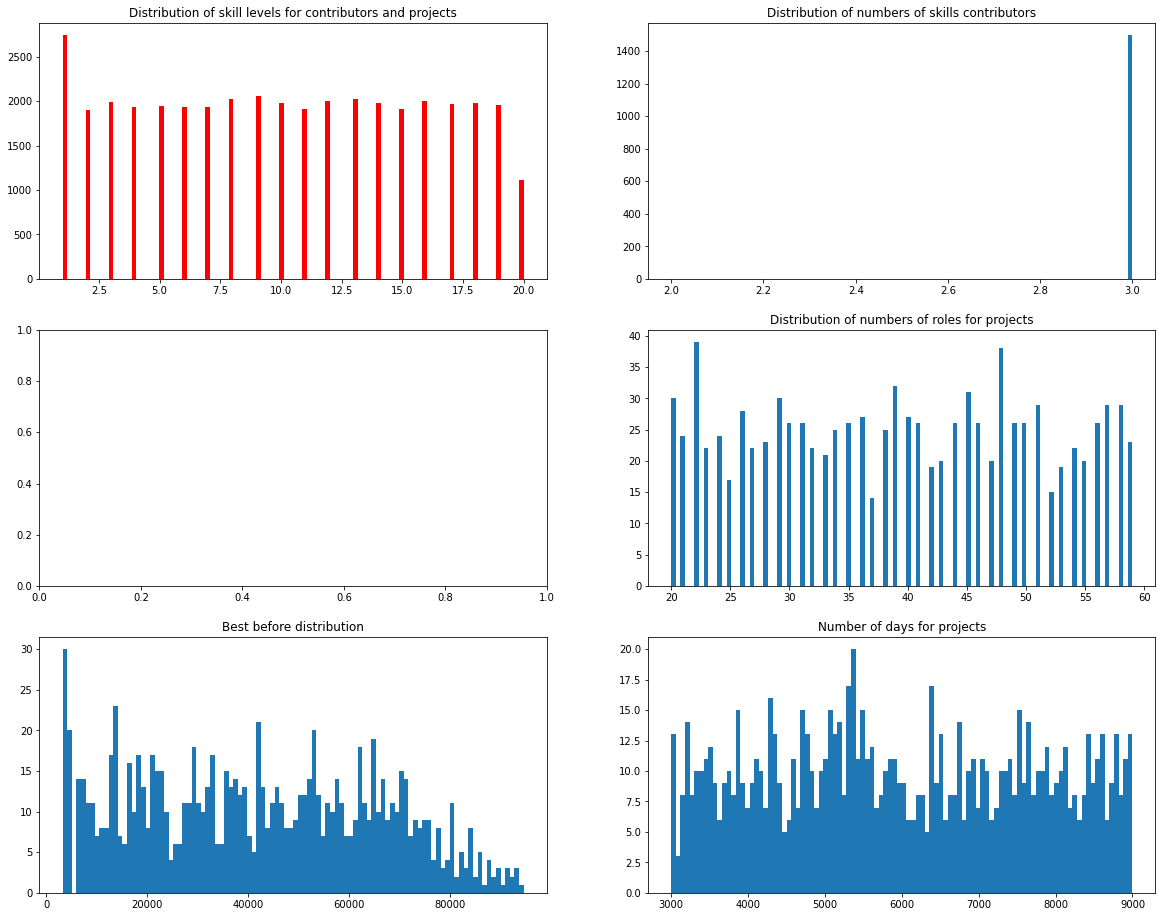

MAX SCORE (SUM OF ALL SCORES): 8036807
AVG score per project: 8036.807
Max day to get score: 133826

AVG number of days per project: 5983.621
AVG best_before: 41954.351

AVG number of roles per project: 39.315
AVG number of unique roles per project: 39.315
SKILL 1 role requires in 99/1000 projects
Projects DON'T HAVE duplicate roles



------------------------------
Stats for d.in
Number of contributors: 500
Number of projects: 1000
AVG skill level per contributor: 3.08
Total number of unique skills: 188



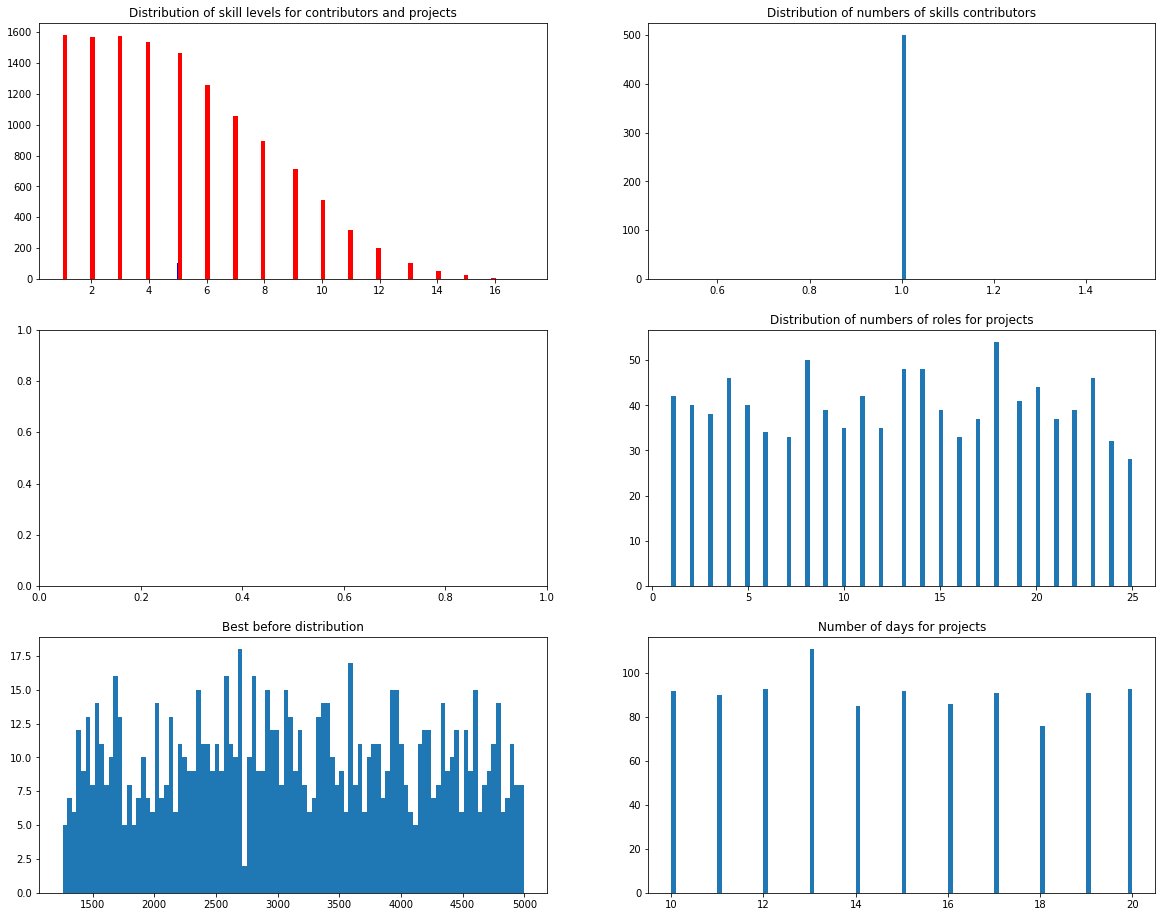

MAX SCORE (SUM OF ALL SCORES): 3229412
AVG score per project: 3229.412
Max day to get score: 15497

AVG number of days per project: 14.919
AVG best_before: 3129.371

AVG number of roles per project: 12.868
AVG number of unique roles per project: 12.308
SKILL 1 role requires in 703/1000 projects
Projects HAVE duplicate roles



------------------------------
Stats for e.in
Number of contributors: 800
Number of projects: 10000
AVG skill level per contributor: 10.0
Total number of unique skills: 800



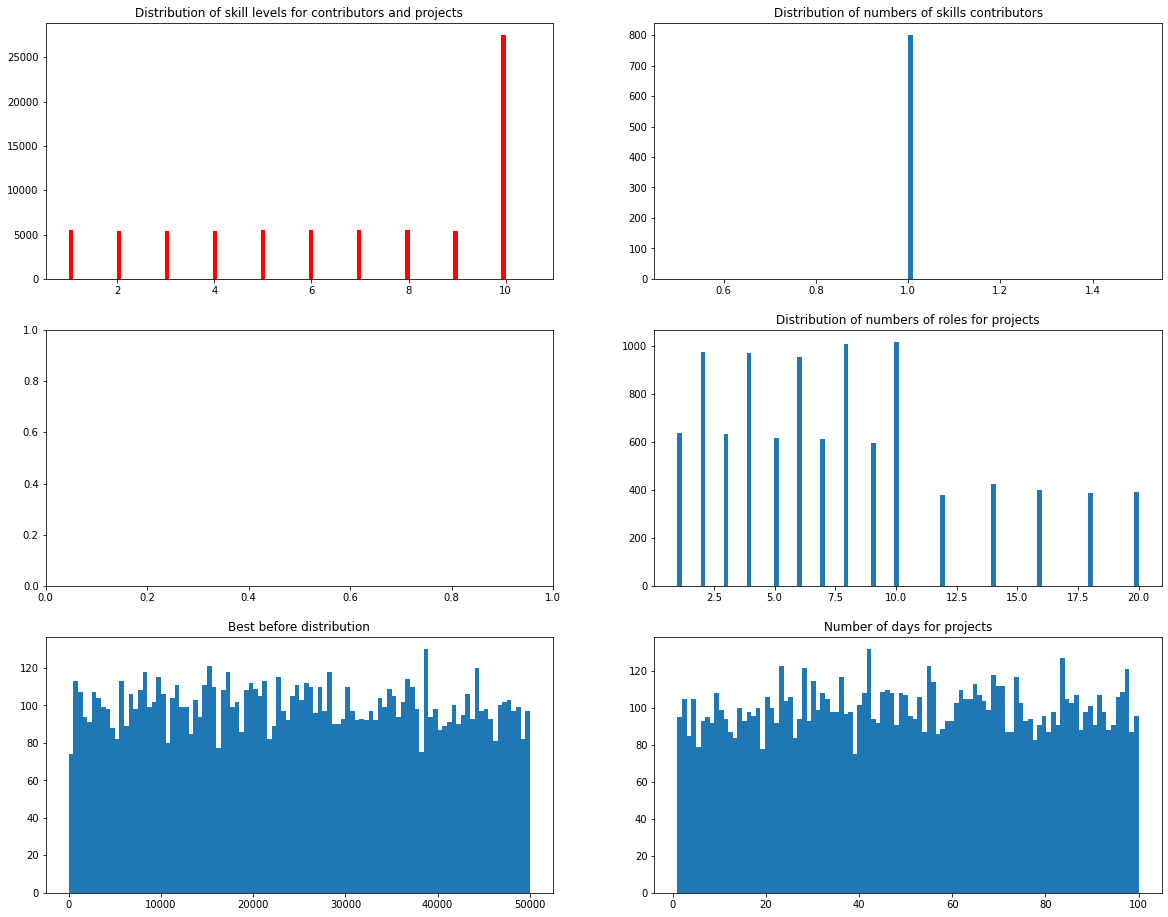

MAX SCORE (SUM OF ALL SCORES): 2774566
AVG score per project: 277.4566
Max day to get score: 50979

AVG number of days per project: 50.8076
AVG best_before: 24855.5478

AVG number of roles per project: 7.6749
AVG number of unique roles per project: 5.4742
SKILL 1 role requires in 4043/10000 projects
Projects HAVE duplicate roles



------------------------------
Stats for f.in
Number of contributors: 1000
Number of projects: 19413
AVG skill level per contributor: 4.980859375
Total number of unique skills: 500



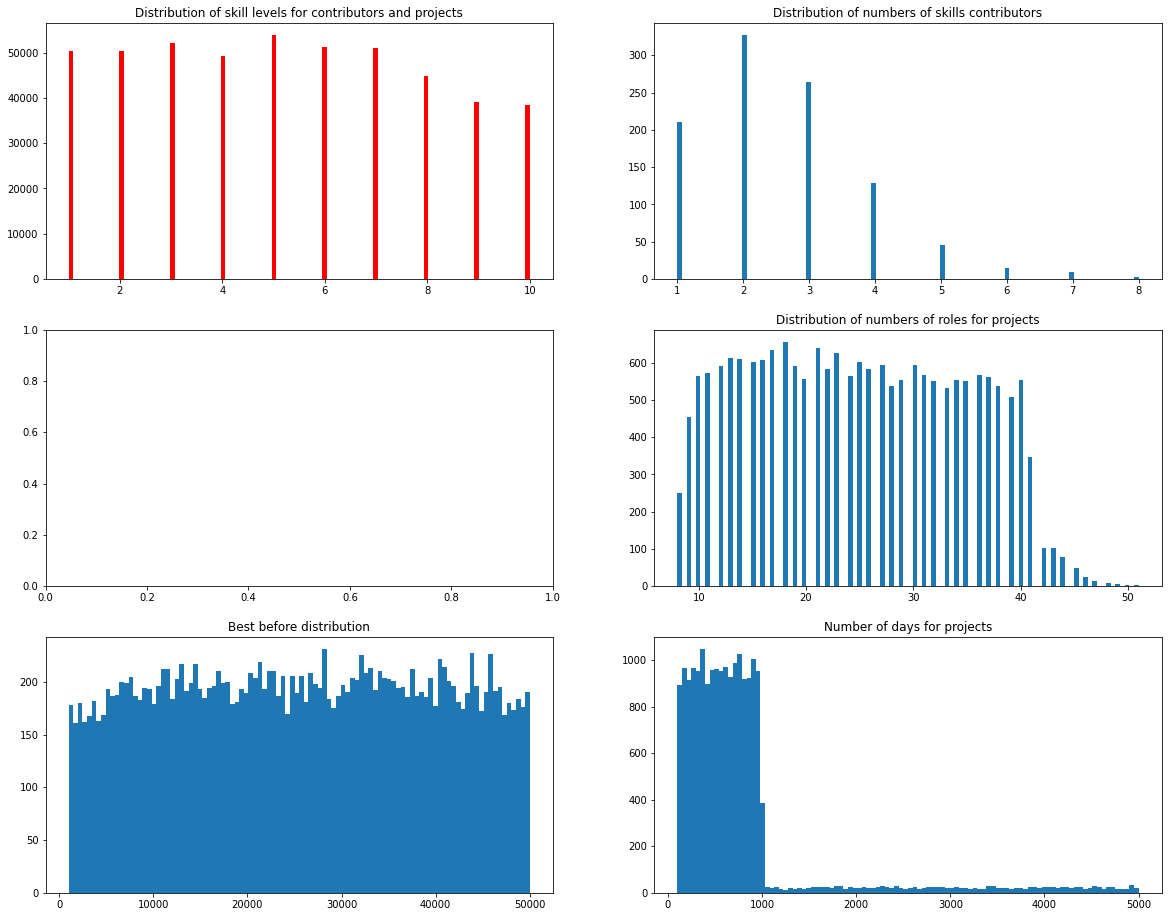

MAX SCORE (SUM OF ALL SCORES): 9136275
AVG score per project: 470.6266419409674
Max day to get score: 54614

AVG number of days per project: 779.614330603204
AVG best_before: 25652.61809096997

AVG number of roles per project: 24.764281666924226
AVG number of unique roles per project: 3.2741461906969556
SKILL 1 role requires in 3077/19413 projects
Projects HAVE duplicate roles



DISRIBUTION OF SCORES BETWEEN TESTS:
A 40 0.00%
B 1239673 5.08%
C 8036807 32.92%
D 3229412 13.23%
E 2774566 11.36%
F 9136275 37.42%


In [3]:
    
def analyze():
    max_scores = {}
    for filename in sorted(os.listdir("test")):
        if filename.endswith(".in"):
            with open(os.path.join('test', filename)) as f:
                print("-" * 30)
                print("Stats for {}".format(filename))
                max_score = analyze_file(f)
                max_scores[filename.split('.')[0]] = max_score
                print('\n'*2)
                
    print("DISRIBUTION OF SCORES BETWEEN TESTS:")
    sum_max_scores = sum(max_scores.values())
    for k, v in max_scores.items():
        print(k.upper(), v, "{:.2f}%".format(v / sum_max_scores * 100))

analyze()